In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('model-training-features.20190805.csv', header=None, names=['account_id', 'size_mb'])
df.head()

,account_id,size_mb
0,1,37.2
1,1000439,1.4
2,1000562,2.2
3,1000788,2.2
4,1001198,2.4


In [25]:
df.describe()

,account_id,size_mb
count,4.889000e+03,4889.000000
mean,1.229663e+06,8.571037
std,1.531373e+06,11.470625
min,1.000000e+00,1.000000
25%,3.607820e+05,2.400000
50%,7.931930e+05,4.000000
75%,1.929840e+06,9.100000
max,9.313045e+06,130.500000


In [39]:
# Difference between size and limit of 15MB.
diff = size_mb - 15
diff

2.0

In [44]:
# If we drop limit to 10 we could expect.
min_val, max_val = 10 + diff, size_mb
n_accounts = df.query('size_mb > @min_val & size_mb < @max_val').shape[0]
n_accounts

281

17.0


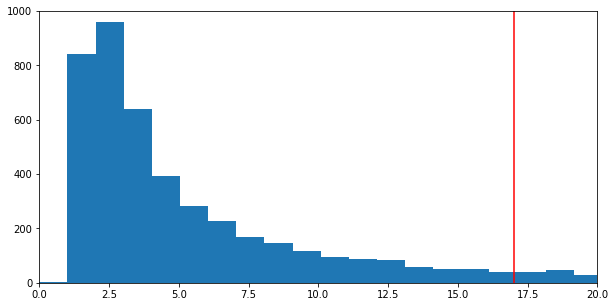

In [53]:
bins = np.linspace(0, 120, 120)

plt.figure(figsize=(10, 5))
plt.hist(df.size_mb, bins=bins, range=(10, 20))
plt.axis([0, 20, 0, 1000])

# Draw vertical line at problem.
max_line = df.query('account_id == 252628').iloc[0].size_mb
print(max_line)
plt.axvline(max_line, color='red')
plt.show()

In [47]:
# As a percentage of small accounts.
small_accounts = df.query('size_mb < @max_val').shape[0]
perc = 100 * n_accounts / small_accounts
perc

6.624233851956625